В открытых источниках представлены данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.  
Цель исследования — помочь руководству интернет-магазина "Стримчик" (магазин, продающий компьютерные игры по всему миру) освоить работу с данными и выявить факторы, определяющие успешность игр. Это позволит ориентироваться на потенциально популярные продукты и планировать рекламные кампании. 


Исследование будет проводиться в соответствии с следующим планом:

1. Изучение общей информации
2. Предобработка данных
3. Проведение исследовательского анализа данных
4. Составление профиля пользователей для каждого региона
5. Проверка гипотез
6. Формулирование выводов

# 1. Изучение общей информации

Импортируем необходимые для анализа данных библиотеки:

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

Ознакомимся с датасетом:

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице содержится 16 715 строк и 11 столбцов. В шести из них присутствуют пропуски данных. Названия столбцов оформлены с нарушением стилей, а типы данных некоторых колонок указаны неверно. Тем не менее, объем информации достаточен для проведения исследования.

# 2. Предобработка данных

**Переименуем столбцы**

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Удалим дубликаты**

In [6]:
df = df.drop_duplicates()

duplicate_columns = ['name', 'platform', 'year_of_release']

duplicates_count_before = df[df.duplicated(subset=duplicate_columns)].count()
print("Количество дубликатов до удаления по указанным столбцам:")
print(duplicates_count_before)

df = df.drop_duplicates(subset=duplicate_columns)
duplicates_count_after = df[df.duplicated(subset=duplicate_columns)].count()
print("Количество дубликатов после удаления по указанным столбцам:")
print(duplicates_count_after)


Количество дубликатов до удаления по указанным столбцам:
name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64
Количество дубликатов после удаления по указанным столбцам:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Весь набор данных был проверен на наличие неявных дубликатов по столбцам name, platform и year_of_release. Затем дублирующие строки были удалены с последующей проверкой.

**Обработка пропусков**

In [7]:
# Проверим, сколько процентов значений отсутствуют в столбце `name`.
missing_name = df['name'].isnull().mean() * 100 
print(f"В столбце `name` отсутствуют значения в {missing_name:.3f}% данных.")

В столбце `name` отсутствуют значения в 0.006% данных.


In [8]:
df = df.dropna(subset=['name'])

In [9]:
# Проверим, сколько процентов значений отсутствуют в столбце `year_of_release`:
missing_year = df['year_of_release'].isnull().mean() * 100
print(f"В столбце `year_of_release` отсутствуют значения в {missing_year:.3f}% данных.")

В столбце `year_of_release` отсутствуют значения в 1.610% данных.


In [10]:
df = df.dropna(subset=['year_of_release'])
#df.isna().sum()

In [11]:
# Проверим, сколько процентов значений отсутствуют в столбце `critic_score`:
missing_critic = df['critic_score'].isnull().mean() * 100
print(f"В столбце `critic_score` отсутствуют значения в {missing_critic:.3f}% данных.")

В столбце `critic_score` отсутствуют значения в 51.457% данных.


Более половины данных в этом столбце отсутствуют. Заменим отсутствующие значения на специальное значение -1, которое будет означать, что оценка отсутствует. Выбираем именно такой способ заполнения пропусков, т.к. при таком объеме заменять пропуски на среднее или медиану было бы некорректно.

In [12]:
df['critic_score'] = df['critic_score'].fillna(-1)
print("Пропуски в `critic_score` заменены на -1.")

Пропуски в `critic_score` заменены на -1.


In [13]:
# Проверим, сколько процентов значений отсутствуют в столбце `user_score`
missing_user = df['user_score'].isnull().mean() * 100
print(f"В столбце `user_score` отсутствуют значения в {missing_user:.3f}% данных.")

В столбце `user_score` отсутствуют значения в 40.169% данных.


Значительная доля данных отсутствует, что делает статистическую замену (на медиану или среднее) ненадёжной. Заменим отсутствующие значения на специальное значение -1.

In [14]:
df['user_score'] = df['user_score'].fillna(-1)
print("Пропуски в `user_score` заменены на -1.")

Пропуски в `user_score` заменены на -1.


In [15]:
# Проверим, сколько процентов значений равно 'tbd'
tbd_user = (df['user_score'] == 'tbd').mean() * 100
print(f"В столбце `user_score` имеется 'tbd' в {tbd_user:.3f}% данных.")

В столбце `user_score` имеется 'tbd' в 14.450% данных.


user_score равен 'tbd' (to be determined) в 14.45% данных, заменим эти значения на -1, чтобы привести все значения столбца к одному типу данных.

In [16]:
df['user_score'] = df['user_score'].replace('tbd', -1)
print("'tbd' в `user_score` заменены на -1.")

'tbd' в `user_score` заменены на -1.


In [17]:
df['user_score'].value_counts()

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
0.7       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [18]:
# Проверим, сколько процентов значений отсутствуют в столбце `rating`
missing_rating = df['rating'].isnull().mean() * 100
print(f"В столбце `rating` отсутствуют значения в {missing_rating:.3f}% данных.")

В столбце `rating` отсутствуют значения в 40.601% данных.


Пропусков достаточно много, и статистическая замена может искажать данные. Используем строковое значение 'unknown' для обозначения неизвестной возрастной категории.

In [19]:
df['rating'] = df['rating'].fillna('unknown')
print("Пропуски в `rating` заменены на 'unknown'.")

Пропуски в `rating` заменены на 'unknown'.


In [20]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски были удалены, либо заменены.

**Преобразуем типы столбцов**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [22]:
df['year_of_release'] = (df['year_of_release']).astype('int')
df['critic_score'] = (df['critic_score']).astype('int')
df['user_score'] = (df['user_score']).astype('float')

**Посчитаем суммарные продажи во всех регионах**

In [23]:
df['total_sales'] = df[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df[['name', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,name,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,Wii,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,NES,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,11.27,8.89,10.22,1.00,31.38


**Итоги предобработки данных:**


- Удалены строки с неявными дубликатами.
- Удалены строки с пропусками в тех столбцах, где это было возможным.
- В столбцах с большим количеством пропусков произвдена замена на соответствующие типу данных значения.
- Посчитаны и занесены в таблицу суммарные продажи по всем регионам.

# 3. Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы:**

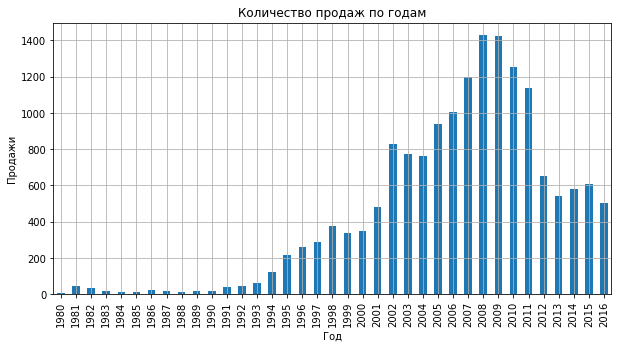

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


In [24]:
counts = df[df['year_of_release'] > -1]['year_of_release'].value_counts().sort_index()

counts.plot(kind='bar', figsize=(10, 5), grid=True)
plt.title('Количество продаж по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

print(df[df['year_of_release'] > -1]['year_of_release'].describe())

Анализ графика:
- График демонстрирует значительный рост числа продаж начиная с конца 90-х годов, с пиком в период между 2007 и 2010 годами.
- После пика 2010 года виден спад числа продаж, однако наблюдается некоторое возрастание на протяжении следующих лет до 2016 года.
- Самые ранние годы, начиная с 1980 года, показывают низкий уровень продаж, который постепенно возрастает к середине 90-х годов.


Современные данные (с 2000 года и далее) для нашего анализа будут более актуальны, поскольку отражают текущее состояние рынка. Эти данные могут лучше показать, как современные технологии и маркетинговые стратегии влияют на успех продукта. Особенно важны данные с 2010 года и далее

**Исследуем данные по платформам**

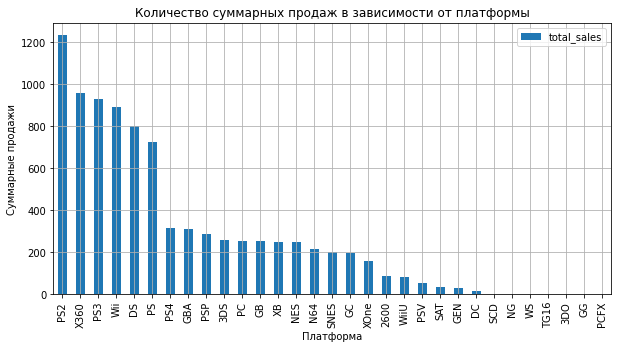

In [25]:
sales = (
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

sales.plot(kind='bar', figsize=(10, 5), grid=True)
plt.title('Количество суммарных продаж в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

По графику суммарных продаж с большим отрывом лидируют 6 платформ. Посмотрим, как вели себя продажи у каждой из платформ по годам:

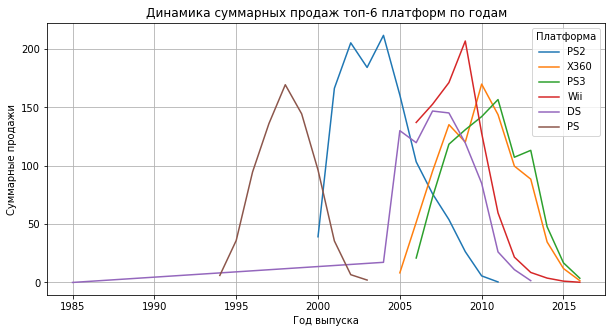

In [26]:
top_sales = (
    df.groupby('platform')['total_sales']
    .sum()
    .nlargest(6)
    .index
)

plt.figure(figsize=(10, 5))

for platform in top_sales:
    sales_by_year = (
        df[df['platform'] == platform]
        .groupby('year_of_release')['total_sales']
        .sum()
        .sort_index()
    )
    sales_by_year.plot(label=platform)

plt.title('Динамика суммарных продаж топ-6 платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

График продаж консоли DS ведет себя странно - количество продаж до 2004 года крайне низкое и практически не меняется. Проверим, почему так вышло:

In [27]:
print(df.query('platform == "DS" and year_of_release < 2004'))


                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0            -1        -1.0   

        rating  total_sales  
15957  unknown         0.02  


График показывает странное поведение платформы DS, потому что в данных есть ошибка: в наборе данных для платформы DS зарегистрирован выпуск игры в 1985 году, что неправильно, так как консоль DS была выпущена только в 2004 году.
Удалим эту запись из данных:

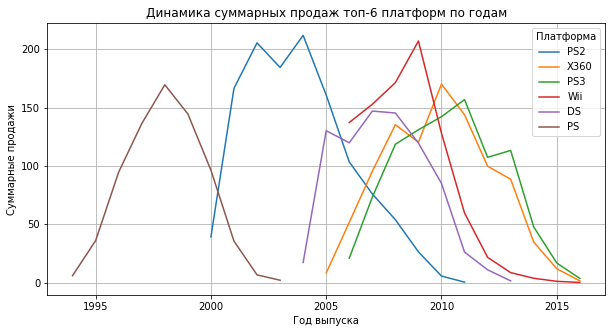

In [28]:
df = df[~((df['platform'] == 'DS') & (df['year_of_release'] < 2004))] #Удлим все записи по консоли DF раньше 2004 года
 
top_sales = (
    df.groupby('platform')['total_sales']
    .sum()
    .nlargest(6)
    .index
)

plt.figure(figsize=(10, 5))

for platform in top_sales:
    sales_by_year = (
        df[df['platform'] == platform]
        .groupby('year_of_release')['total_sales']
        .sum()
        .sort_index()
    )
    sales_by_year.plot(label=platform)

plt.title('Динамика суммарных продаж топ-6 платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

Определим характерный срок появления и исчезновения игровых платформ, а также выявим период, в течение которого платформы находятся на пике своей популярности (судя по предыдущему графику - это первая половина периода существования платформ):

In [29]:
# Определим минимальный и максимальный год выпуска игр для платформ
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# Рассчитаем продолжительность существования платформы (включая оба граничных года)
platform_lifespan['lifecycle_duration'] = platform_lifespan['max'] - platform_lifespan['min'] + 1

# Найдем медиану продолжительности существования платформ
median_lifecycle_duration = platform_lifespan['lifecycle_duration'].median()
print(f'Медианное значение продолжительности жизненного цикла платформ: {median_lifecycle_duration} лет')

# Рассчитаем первую половину медианного срока существования (период пика популярности)
peak_period = np.ceil(median_lifecycle_duration / 2)
print(f'Определим актуальный период за последние {peak_period} года')


Медианное значение продолжительности жизненного цикла платформ: 7.0 лет
Определим актуальный период за последние 4.0 года


**Вывод:**

На основе анализа данных, медианная продолжительность существования платформ на рынке составляет 7 лет, а первые 4 года этого срока являются наиболее продуктивными в плане продаж и поддержки игр.

**Исследуем продажи платформ на текущий период:**

In [30]:
recent_platforms = (
    df.query('year_of_release >= 2016 - @peak_period')
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)
recent_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

In [31]:
recent_data = df.query('year_of_release >= 2016 - @peak_period').reset_index(drop=True)
recent_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


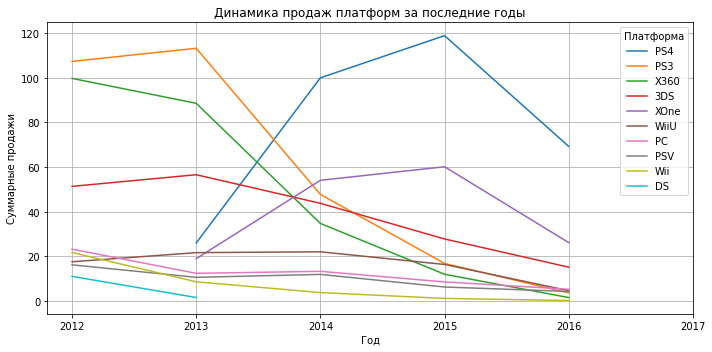

In [32]:
for platform in recent_platforms:
    platform_sales = (
        recent_data.query('platform == @platform')
        .groupby('year_of_release')['total_sales']
        .sum()
        .sort_index()
    )
    platform_sales.plot(kind='line', figsize=(10, 5), label=platform)

plt.title('Динамика продаж платформ за последние годы')
plt.xticks(np.arange(2012, 2018, step=1))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.grid(True)
plt.tight_layout()
plt.show()

- Наиболее перспективной платформой в 2016 году остаётся PS4, которая демонстрирует высокие продажи, несмотря на небольшое снижение. За ней следует XOne, хотя её пик уже пройден.
- Платформы предыдущего поколения (PS3, X360, Wii, DS) практически полностью потеряли актуальность.
- 3DS и WiiU также находятся на стадии спада, и их перспективы в 2016 году незначительны.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:**

In [33]:
recent_data['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

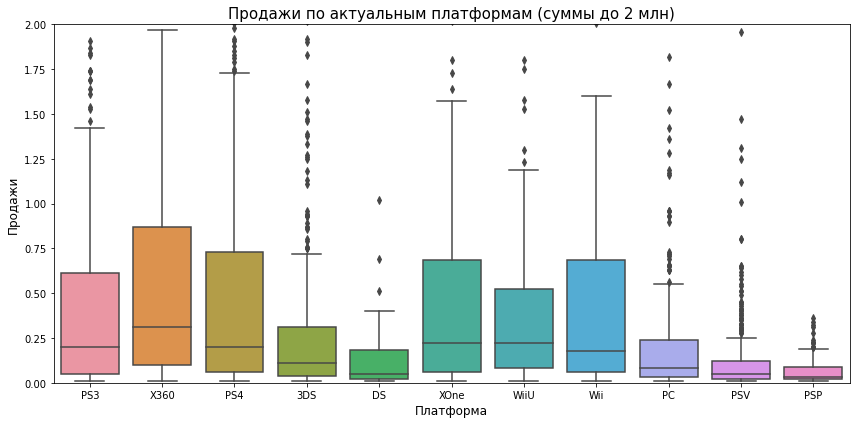

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=recent_data, x='platform', y='total_sales')
ax.set(ylim=(0, 2))
plt.title('Продажи по актуальным платформам (суммы до 2 млн)', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи', fontsize=12)

plt.tight_layout()
plt.show()

**Вывод:**

- Большинство платформ имеют медианные продажи ниже 0.5 млн копий, что указывает на то, что значительная часть игр продается небольшими тиражами.
- Платформы **X360**, **PS4**, и **XOne** демонстрируют более высокие уровни продаж, с медианами и разбросом, которые выше, чем у других платформ, что говорит о значительном успехе на этих платформах.
- **Wii**, **WiiU** и **PS3** также демонстрируют высокий разброс продаж, что указывает на наличие игр-хитов, однако медианные продажи для этих платформ всё же ниже, чем у лидеров.
- **PC**, **PSV**, **PSP** и **DS** имеют низкие медианы продаж, что свидетельствует о том, что большинство игр на этих платформах продаются плохо, и лишь немногие достигают высоких значений.
- На графике можно заметить большое количество выбросов на платформах, таких как **X360**, **PS4**, **Wii**, и **PC**, что говорит о наличии нескольких игр с крайне высокими продажами по сравнению с основной массой.
- Это подтверждается и максимальными значениями по описательной статистике, где 21.05 млн копий — это явный выброс.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:**

In [35]:
# Определим топ-6 актуальных платформ по продажам
top_6_platforms = (
    recent_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(6)['platform'].tolist()
)

top_6_platforms


['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU']

Корреляция между оценками пользователей и продажами для платформы PS4 = -0.031957110204556376


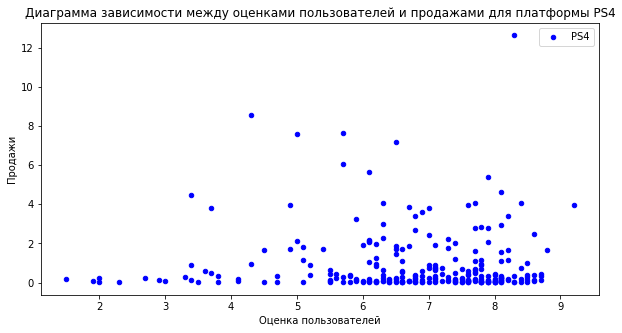

Корреляция между оценками пользователей и продажами для платформы PS3 = -0.006205767686051523


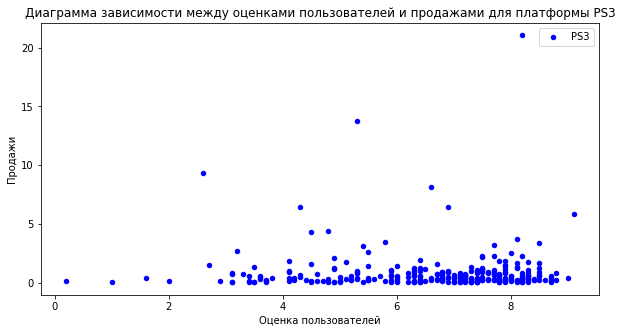

Корреляция между оценками пользователей и продажами для платформы X360 = 0.006163978646213326


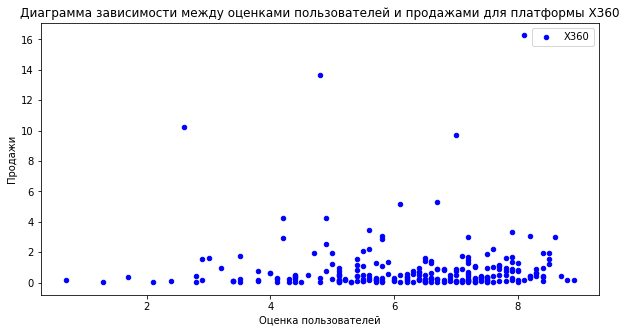

Корреляция между оценками пользователей и продажами для платформы 3DS = 0.19758263411038599


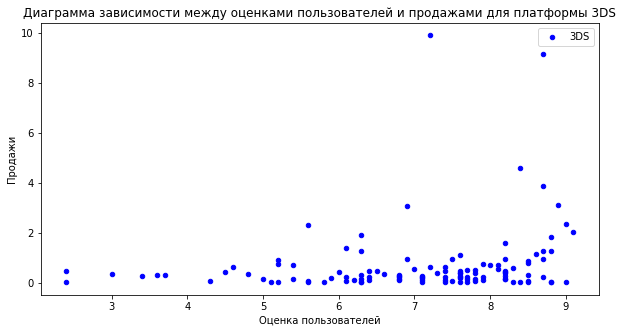

Корреляция между оценками пользователей и продажами для платформы XOne = -0.06892505328279414


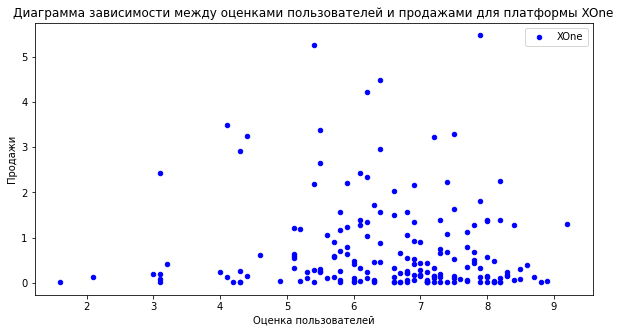

Корреляция между оценками пользователей и продажами для платформы WiiU = 0.4002190202148617


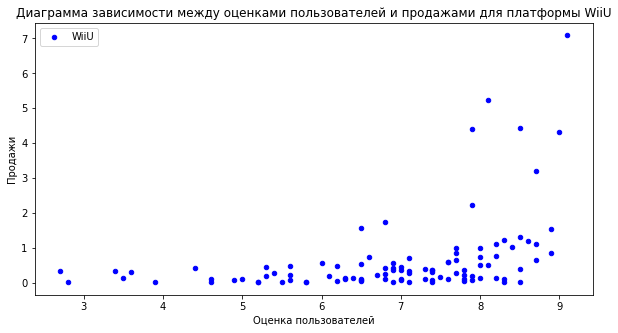

In [36]:
# Строим график зависимости между оценками пользователей и продажами для топ-6 платформ
for platform in top_6_platforms:
    (
    recent_data
        .query('platform == @platform and user_score > -1')
        .plot(x='user_score', 
              y='total_sales', 
              kind='scatter', 
              figsize=(10, 5), 
              color='blue')
    )
    plt.title(f'Диаграмма зависимости между оценками пользователей и продажами для платформы {platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([platform])
    
    # Вычислим корреляции между оценками пользователей и продажами
    correlation = recent_data.query('platform == @platform and user_score > -1')['user_score'].corr(
        recent_data.query('platform == @platform and user_score > -1')['total_sales']
    )
    
    print(f'Корреляция между оценками пользователей и продажами для платформы {platform} =', correlation)
    plt.show()


По графикам можно сказать, что для большинства платформ оценки пользователей и продажи игр не имеют явной сильной зависимости. Самая высокий коэффициент корреляции - 0.4(что указывает на умеренную положительную связь между оценками пользователей и продажами) у платформы `WiiU`. 

**Посмотрим на диаграммы распределения:**

Корреляция между оценками критиков и продажами для платформы PS4 = 0.40656790206178095


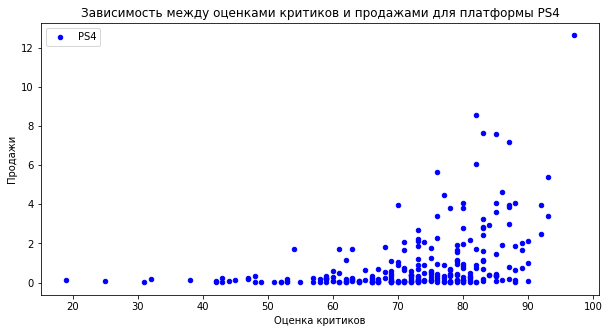

Корреляция между оценками критиков и продажами для платформы PS3 = 0.3341517575509856


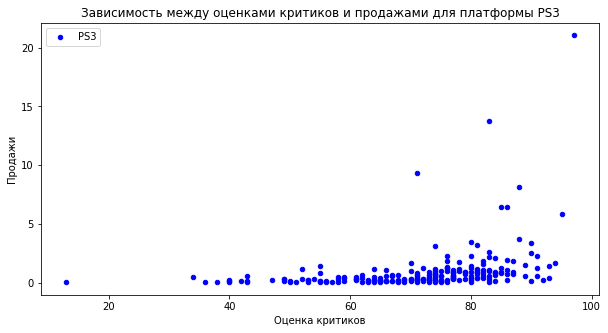

Корреляция между оценками критиков и продажами для платформы X360 = 0.3605734888507336


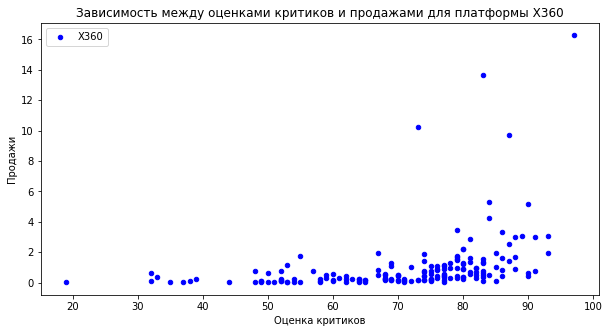

Корреляция между оценками критиков и продажами для платформы 3DS = 0.3208028695360785


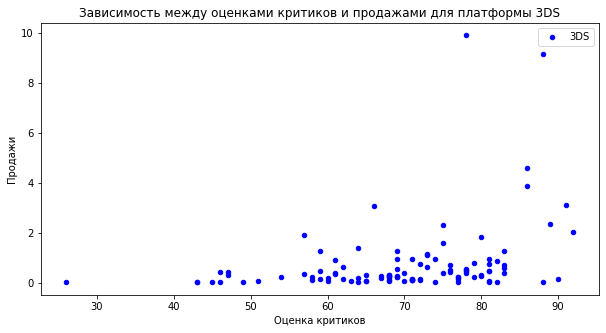

Корреляция между оценками критиков и продажами для платформы XOne = 0.4169983280084017


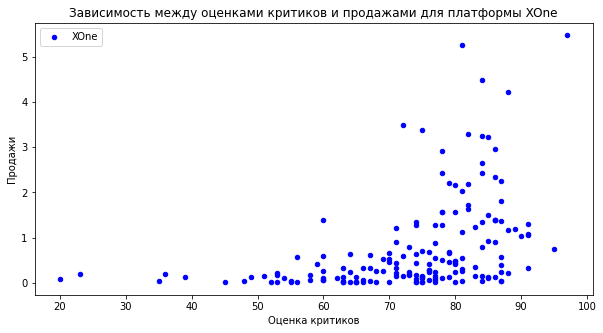

Корреляция между оценками критиков и продажами для платформы WiiU = 0.34837976012017485


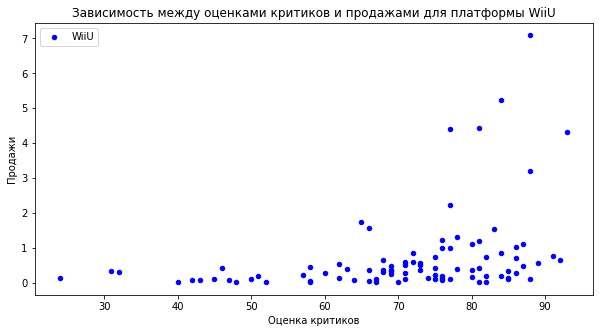

In [37]:
# Строим график зависимости между оценками критиков и продажами для топ-6 платформ
for platform in top_6_platforms:
    (
    recent_data
        .query('platform == @platform and critic_score > -1')
        .plot(x='critic_score', 
              y='total_sales', 
              kind='scatter', 
              figsize=(10, 5), 
              color='blue')
    )
    plt.title(f'Зависимость между оценками критиков и продажами для платформы {platform}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([platform])
    
    # Вычисление корреляции между оценками критиков и продажами
    correlation = recent_data.query('platform == @platform and critic_score > -1')['critic_score'].corr(
        recent_data.query('platform == @platform and critic_score > -1')['total_sales']
    )
    
    print(f'Корреляция между оценками критиков и продажами для платформы {platform} =', correlation)
    plt.show()

Диаграммы распределения демонстрируют умеренную зависимость между оценками критиков и продажами для каждой платформы. 

In [38]:
print('Взаимосвязь между оценками пользователей и общим объёмом продаж = ', recent_data.query('user_score > -1')['user_score'].corr(recent_data['total_sales']))

Взаимосвязь между оценками пользователей и общим объёмом продаж =  0.0041944811069172284


In [39]:
print('Взаимосвязь между оценками критиков и общим объёмом продаж = ', recent_data.query('critic_score > -1')['critic_score'].corr(recent_data['total_sales']))


Взаимосвязь между оценками критиков и общим объёмом продаж =  0.30863336128976016


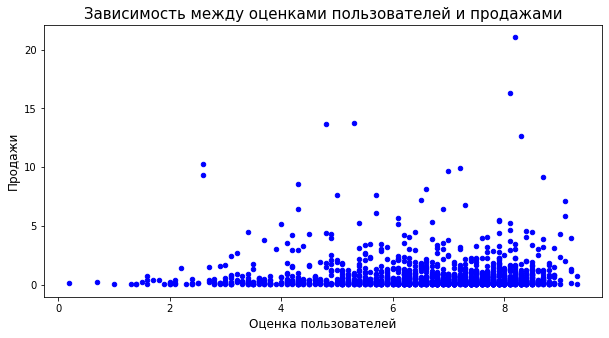

In [40]:
(
 recent_data.query('user_score > -1')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
)
plt.title('Зависимость между оценками пользователей и продажами', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()

**Вывод**:

- Коэффициент корреляции между оценками пользователей и общим объемом продаж составляет 0.004, что указывает на практически полное отсутствие связи между этими показателями.
- На графике видно, что даже при увеличении оценок пользователей, продажи остаются на низком уровне, без заметной зависимости. Некоторые игры с высокими оценками имеют очень низкие продажи, и наоборот, игры с низкими оценками иногда продаются в большом количестве.
- Возможно, другие факторы, такие как маркетинг, популярность франшизы или эксклюзивность игры, оказывают большее влияние на успех игры.
---

- Коэффициент корреляции между оценками критиков и продажами составляет 0.308, что указывает на умеренную положительную связь между этими показателями.
- Это значит, что игры с высокими оценками критиков чаще имеют хорошие продажи, однако связь не является очень сильной. Но и здесь могут быть исключения — игры с низкими оценками могут продаваться хорошо благодаря другим факторам.

**Посмотрим на общее распределение игр по жанрам:** 

Построим суммарные продажи игр по жанрам для актуального периода. Определим, какие жанры являются самыми прибыльными, и вычислим общую сумму продаж для каждого жанра.

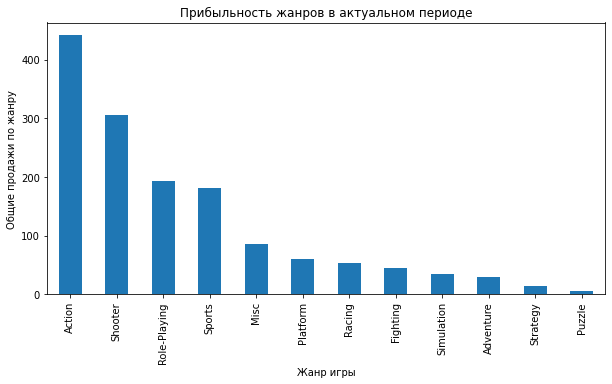

In [41]:
(recent_data
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False, title='Прибыльность жанров в актуальном периоде')
 .set(xlabel='Жанр игры', ylabel='Общие продажи по жанру'))

plt.show()

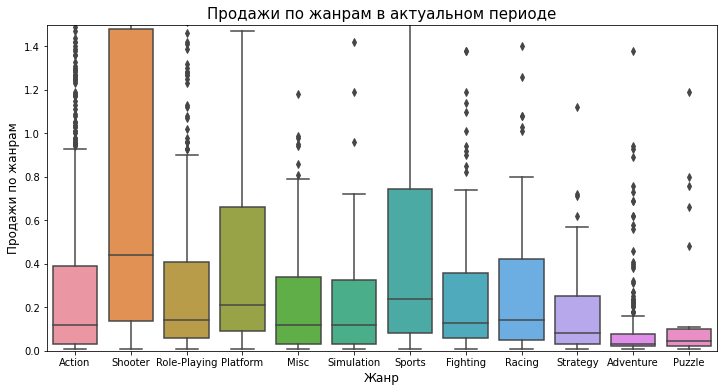

In [42]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=recent_data, x='genre', y='total_sales')
ax.set(ylim=(0, 1.5))
plt.title('Продажи по жанрам в актуальном периоде', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам', fontsize=12)
plt.show()

In [43]:
(
 recent_data
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values('total_sales', ascending=False)
)


,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


- Лидером по суммарным продажам является жанр Shooter с показателем продаж 0.440 млн единиц. Это подтверждается и на первом графике, где жанр выделяется самыми высокими продажами.
- На втором месте — жанр Sports, с продажами 0.240 млн единиц, и Platform с 0.210 млн единиц.
- Role-Playing, Racing, и Fighting занимают следующие позиции, демонстрируя умеренные результаты с продажами в диапазоне 0.130–0.140 млн единиц.

**Вывод по исследовательскому анализу данных:**

- Самыми перспективными платформами на 2016 год являются **PS4**, **XOne**, и **PC**.
- При этом, платформы **WiiU** и **3DS** демонстрируют спад, что указывает на уменьшение их популярности и менее перспективные продажи в будущем.
- Оценки пользователей не оказывают значительного влияния на продажи. Это означает, что пользовательские оценки не являются ключевым фактором для успеха игры на рынке.
- Оценки критиков показали умеренную положительную связь с продажами. Это говорит о том, что игры, получающие высокие оценки критиков, имеют тенденцию к лучшим продажам

# 4. Составим портрет пользователя каждого региона

**Определим топ-5 самых популярных платформ по регионам:**

In [44]:
# Просуммируем продажи по платформам в Северной Америке
na_sales = (
    recent_data
    .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .reset_index()
)

# Просуммируем остальные платформы в категорию "Other"
na_sales.loc[5:, 'platform'] = 'Other'
na_sales.loc[5, 'na_sales'] = na_sales.loc[5:, 'na_sales'].sum().round(2)
na_sales = na_sales.iloc[0:6, :]

# Просуммируем продажи по платформам в Европе
eu_sales = (
    recent_data
    .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .reset_index()
)

# Просуммируем остальные платформы в категорию "Other"
eu_sales.loc[5:, 'platform'] = 'Other'
eu_sales.loc[5, 'eu_sales'] = eu_sales.loc[5:, 'eu_sales'].sum().round(2)
eu_sales = eu_sales.iloc[0:6, :]

# Просуммируем продажи по платформам в Японии
jp_sales = (
    recent_data
    .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .reset_index()
)

# Просуммируем остальные платформы в категорию "Other"
jp_sales.loc[5:, 'platform'] = 'Other'
jp_sales.loc[5, 'jp_sales'] = jp_sales.loc[5:, 'jp_sales'].sum().round(2)
jp_sales = jp_sales.iloc[0:6, :]

# Объединим данные по продажам в регионах
regional_sales = pd.merge(na_sales, eu_sales, left_index=True, right_index=True)
regional_sales = pd.merge(regional_sales, jp_sales, left_index=True, right_index=True)

regional_sales.rename(columns={
    'platform_x': 'na_platform',
    'platform_y': 'eu_platform',
    'platform': 'jp_platform'
}, inplace=True)

regional_sales

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,140.05,PS4,141.09,3DS,87.79
1,PS4,108.74,PS3,106.85,PS3,35.29
2,PS3,103.38,X360,74.52,PSV,21.04
3,XOne,93.12,XOne,51.59,PS4,15.96
4,3DS,55.31,3DS,42.64,WiiU,13.01
5,Other,90.37,Other,90.12,Other,19.49


In [45]:
data = {
    'region': ['Северная Америка', 'Европа', 'Япония'], 
    'platform_column': ['na_platform', 'eu_platform', 'jp_platform'], 
    'sales_column': ['na_sales', 'eu_sales', 'jp_sales']
}

regional_data = pd.DataFrame(data)

regional_data

,region,platform_column,sales_column
0,Северная Америка,na_platform,na_sales
1,Европа,eu_platform,eu_sales
2,Япония,jp_platform,jp_sales


Построим круговые диаграммы:

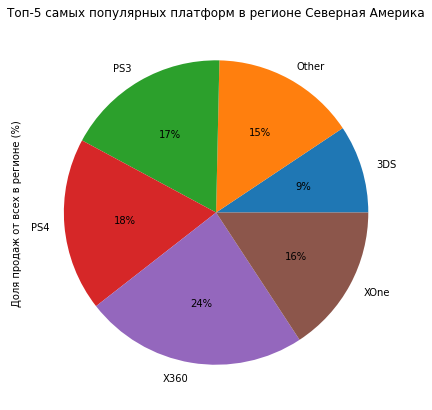

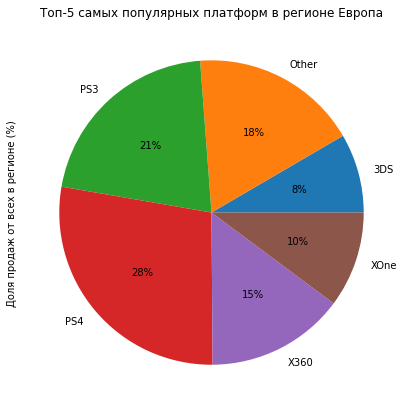

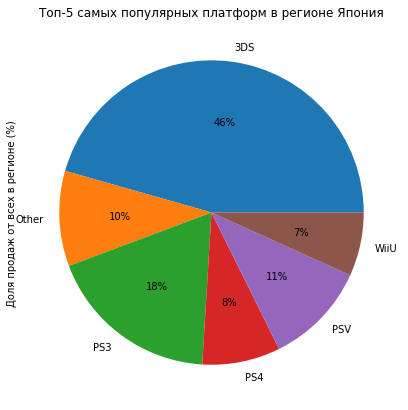

In [46]:
for i in regional_data.index:
    region_name = regional_data['region'][i]
    
    (regional_sales.pivot_table(
        index=regional_data['platform_column'][i], 
        values=regional_data['sales_column'][i], 
        aggfunc='sum')
     .plot(kind='pie', y=regional_data['sales_column'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    
    plt.title(f'Топ-5 самых популярных платформ в регионе {region_name}')
    plt.show()

In [47]:
print('ТОП-5 платформ по регионам: Северная Америка, Европа, Япония и их доли продаж')

regional_sales['na_sales'] = round(regional_sales['na_sales'] / regional_sales['na_sales'].sum() * 100, 2)
regional_sales['eu_sales'] = round(regional_sales['eu_sales'] / regional_sales['eu_sales'].sum() * 100, 2)
regional_sales['jp_sales'] = round(regional_sales['jp_sales'] / regional_sales['jp_sales'].sum() * 100, 2)

regional_sales

ТОП-5 платформ по регионам: Северная Америка, Европа, Япония и их доли продаж


,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,23.70,PS4,27.84,3DS,45.59
1,PS4,18.40,PS3,21.08,PS3,18.32
2,PS3,17.49,X360,14.70,PSV,10.93
3,XOne,15.76,XOne,10.18,PS4,8.29
4,3DS,9.36,3DS,8.41,WiiU,6.76
5,Other,15.29,Other,17.78,Other,10.12


**Вывод:**

1. Северная Америка: Рынок сильно ориентирован на консоли Microsoft, особенно на X360, который занимает лидирующие позиции. Консоли PlayStation, такие как PS4 и PS3, также имеют значительные доли.
2. Европа: Наблюдается доминирование консолей PlayStation. PS4 является самой популярной платформой, следом идут PS3 и X360.
3. Япония: Здесь основной консолью является 3DS. Платформы PS3, PSV, и PS4 также имеют значительное присутствие.

**Найдем самые популярные жанры (топ-5) по регионам:**

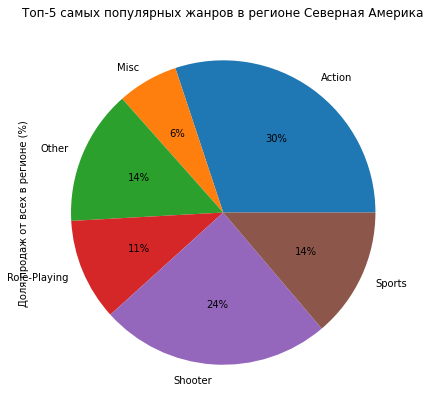

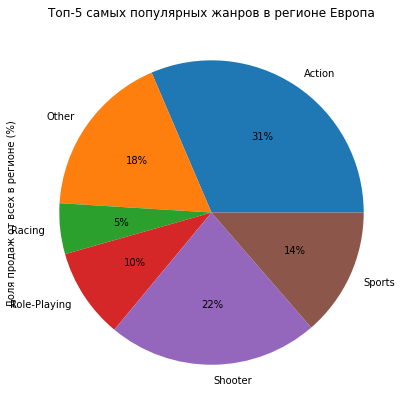

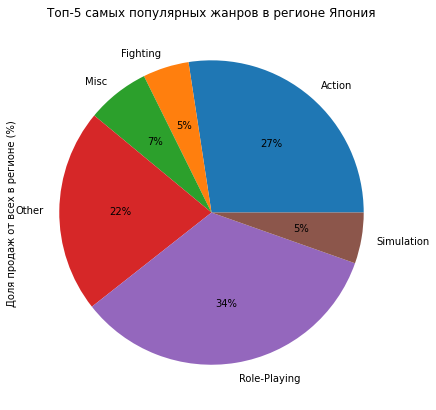

In [48]:
# Северная Америка
na_genres = (
    recent_data
    .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .reset_index()
)
na_genres.loc[5:, 'genre'] = 'Other'
na_genres.loc[5, 'na_sales'] = na_genres.loc[5:, 'na_sales'].sum().round(2)
na_genres = na_genres.iloc[0:6, :]

# Европа
eu_genres = (
    recent_data
    .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .reset_index()
)
eu_genres.loc[5:, 'genre'] = 'Other'
eu_genres.loc[5, 'eu_sales'] = eu_genres.loc[5:, 'eu_sales'].sum().round(2)
eu_genres = eu_genres.iloc[0:6, :]

# Япония
jp_genres = (
    recent_data
    .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .reset_index()
)
jp_genres.loc[5:, 'genre'] = 'Other'
jp_genres.loc[5, 'jp_sales'] = jp_genres.loc[5:, 'jp_sales'].sum().round(2)
jp_genres = jp_genres.iloc[0:6, :]

genre_sales = pd.merge(na_genres, eu_genres, left_index=True, right_index=True)
genre_sales = pd.merge(genre_sales, jp_genres, left_index=True, right_index=True)

genre_sales.rename(columns={'genre_x': 'na_genre', 'genre_y': 'eu_genre', 'genre': 'jp_genre'}, inplace=True)

data = {'region': ['Северная Америка', 'Европа', 'Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']}
regions_genre_sales = pd.DataFrame(data)

for i in regions_genre_sales.index:
    region_name = regions_genre_sales['region'][i]
    
    (genre_sales.pivot_table(index=regions_genre_sales['genre'][i], values=regions_genre_sales['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions_genre_sales['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    
    plt.title(f'Топ-5 самых популярных жанров в регионе {region_name}')
    plt.show()


In [49]:
print('ТОП-5 жанров по регионам: Северная Америка, Европа, Япония и их доли продаж')

genre_sales['na_sales'] = round(genre_sales['na_sales'] / genre_sales['na_sales'].sum() * 100, 2)
genre_sales['eu_sales'] = round(genre_sales['eu_sales'] / genre_sales['eu_sales'].sum() * 100, 2)
genre_sales['jp_sales'] = round(genre_sales['jp_sales'] / genre_sales['jp_sales'].sum() * 100, 2)

genre_sales

ТОП-5 жанров по регионам: Северная Америка, Европа, Япония и их доли продаж


,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Action,30.09,Action,31.44,Role-Playing,33.98
1,Shooter,24.50,Shooter,22.39,Action,27.42
2,Sports,13.80,Sports,13.63,Misc,6.68
3,Role-Playing,10.83,Role-Playing,9.58,Simulation,5.41
4,Misc,6.46,Racing,5.38,Fighting,4.90
5,Other,14.32,Other,17.58,Other,21.62


**Выводы:**

- Action — самый популярный жанр как в Северной Америке и в Европе, занимает около трети всех продаж. В Японии этот жанр на втором месте.
- Shooter занимает второе место в Северной Америке и Европе, но не попадает в ТОП-5 в Японии.
- Role-Playing — лидер в Японии. В Северной Америке и Европе этот жанр менее популярен, но всё равно входит в пятёрку лучших.
- Sports стабильно занимает третье место в Северной Америке и Европе, однако в Японии этот жанр не популярен.
- В Японии жанры Simulation и Fighting входят в ТОП-5, чего не наблюдается в других регионах.

**Оценим влияние рейтинга ESRB на продажи в регионах:** 

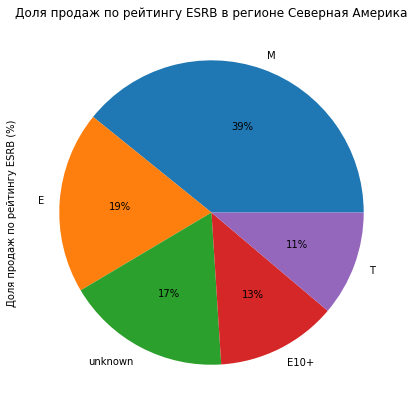

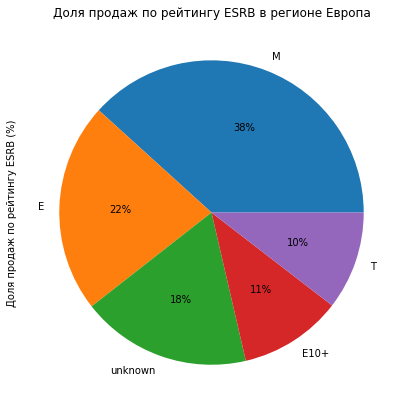

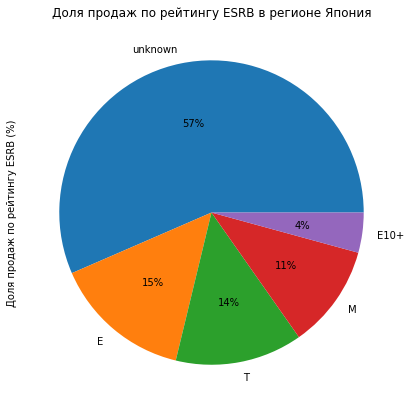

In [50]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

region_names = {
    'na_sales': 'Северная Америка',
    'eu_sales': 'Европа',
    'jp_sales': 'Япония'
}

for region in regions:
    region_name = region_names[region]
    
    
    (recent_data.pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False)
     .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж по рейтингу ESRB (%)')
    )
    
    plt.title(f'Доля продаж по рейтингу ESRB в регионе {region_name}')
    plt.show()

**Вывод:**

- Игры с рейтингом "E" (Everyone) доминируют во всех регионах, особенно в Японии, где они составляют более половины продаж (57%). 
- Игры с рейтингом "M" (Mature), предназначенные для взрослых, занимают значительную долю в Северной Америке (19%) и Европе (22%). В Японии доля таких игр существенно ниже (15%).
- Игры с рейтингом "T" (Teen) занимают стабильные позиции во всех регионах с долей от 14% до 18%.
- Игры с рейтингом "E10+" менее популярны, занимая от 11% до 13% в разных регионах.

**Портрет пользователя по регионам:**

- Северная Америка и Европа имеют схожий портрет пользователя — это семейные игроки и взрослые, предпочитающие экшены, шутеры и игры для широкой аудитории.
- Япония отличается популярностью ролевых игр и игр для всех возрастов. Здесь менее популярны игры для взрослых по сравнению с западными рынками.

# 5. Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- H0 (нулевая гипотеза): Средние пользовательские рейтинги платформ XOne и PC одинаковы.
- H1 (альтернативная гипотеза): Средние пользовательские рейтинги платформ XOne и PC различаются.

In [51]:
xone_data = recent_data.query('platform == "XOne" and user_score > -1')
print('Описательная статистика пользовательских рейтингов для XOne:\n\n', xone_data['user_score'].describe())

pc_data = recent_data.query('platform == "PC" and user_score > -1')
print('Описательная статистика пользовательских рейтингов для PC:\n\n', pc_data['user_score'].describe())

Описательная статистика пользовательских рейтингов для XOne:

 count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Описательная статистика пользовательских рейтингов для PC:

 count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


In [52]:
# Уровень значимости
alpha = 0.05

# Проведение t-теста для сравнения средних пользовательских рейтингов XOne и PC
results = st.ttest_ind(
    xone_data['user_score'], 
    pc_data['user_score'],
    equal_var=False,  
    alternative='two-sided'  
)


print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги XOne и PC различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги XOne и PC равны.')


p-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги XOne и PC равны.


Вывод: Не удалось отвергнуть нулевую гипотезу, что позволяет предположить, что средние пользовательские рейтинги платформ XOne и PC не отличаются.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

- H0 (нулевая гипотеза): Средние пользовательские рейтинги жанров Action и Sports одинаковы.
- H1 (альтернативная гипотеза): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [53]:
action_genre = recent_data.query('genre == "Action" and user_score > -1')
print('Описательная статистика пользовательских рейтингов для жанра Action\n\n', action_genre['user_score'].describe())

sports_genre = recent_data.query('genre == "Sports" and user_score > -1')
print('Описательная статистика пользовательских рейтингов для жанра Sports\n\n', sports_genre['user_score'].describe())

Описательная статистика пользовательских рейтингов для жанра Action

 count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Описательная статистика пользовательских рейтингов для жанра Sports

 count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


In [54]:
# Уровень значимости
alpha = 0.05

# Проведение t-теста для сравнения средних пользовательских рейтингов жанров Action и Sports
results = st.ttest_ind(
    action_genre['user_score'], 
    sports_genre['user_score'],
    equal_var=False,  
    alternative='two-sided'  
)


print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны.')

p-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


Вывод: Нулевая гипотеза была отвергнута, что позволяет сделать вывод о том, что средние рейтинги жанров Action и Sports различаются.

**Как вы сформулировали нулевую и альтернативную гипотезы?**

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ XOne и PC равны. Альтернативная гипотеза (H1): Средние рейтинги различаются. Поскольку вопрос связан с равенством, использовался двухсторонний тест (alternative='two-sided').

Для жанров Action и Sports также были сформулированы гипотезы: H0 — средние пользовательские рейтинги равны, H1 — они различаются. В обоих случаях проверку проводили двухсторонним тестом.

**Какой критерий применили для проверки гипотез и почему?**

Применён t-тест Стьюдента для независимых выборок, поскольку выборки имеют нормальное распределение и достаточно велики (>30 наблюдений). Параметр equal_var=False был использован, так как дисперсии выборок могут быть различными.

# 6. Вывод

В ходе работы с данными о продажах игр в разных регионах была проведена следующая работа:
1. Была изучена общая информация о датасете, выявлены слабые места: пропуски, нарушение стиля, неверные типы данных. Однако, количество данных было достаточным для проведения дальнейшего анализа.


2. Была проведена предобработка данных, а именно:
 - Проверка на явные дубликаты (не обнаружены);
 - Поиск и удаление неявных дубликатов;
 - Удаление строк с пропусками;
 - Произведено переименование и замена пропущенных значений в ряде столбцов для корректности последующего анализа данных;
 - Исправлены типы данных в ряде столбцов;
 - Рассчитаны и занесены в таблицу суммарные продажи во всех регионах.
 
 
3. Был проведен исследовательский анализ данных:
 - Выбрали подоходящий для целей исследования временной период (последние 7 лет);
 - Выяснили, что:
    - Наиболее перспективной платформой в 2016 году остаётся PS4, которая демонстрирует высокие продажи, несмотря на небольшое снижение. За ней следует XOne, хотя её пик уже пройден.
    - Платформы предыдущего поколения (PS3, X360, Wii, DS) практически полностью потеряли актуальность.
    - 3DS и WiiU также находятся на стадии спада, и их перспективы в 2016 году незначительны.
 - Так же было показано, что:
    - **Оценки пользователей** практически не влияют на продажи игр, что подтверждается очень низким коэффициентом корреляции. Это может свидетельствовать о том, что потребители не всегда полагаются на пользовательские рейтинги при выборе игр.
    - **Оценки критиков**, напротив, оказывают большее влияние на продажи, хотя и не являются основным фактором успеха игры. Умеренная корреляция в 0.308 показывает, что игры с более высокими оценками критиков чаще продаются лучше, но не всегда.
    - Жанр Shooter является самым прибыльным в актуальном периоде с наибольшими суммарными продажами, за ним следуют Sports и Platform.
    - Жанры, такие как Adventure и Puzzle, оказались наименее прибыльными.
    - Выяснили, что каждый регион имеет свои предпочтения. В Северной Америке преобладают консоли Microsoft, в Европе лидируют PlayStation, а в Японии доминируют портативные устройства, такие как 3DS.
    - Показали, что жанры Action и Shooter доминируют в Северной Америке и Европе, тогда как Япония имеет свои *специфические предпочтения*, с акцентом на Role-Playing игры.
    
    
4. Для каждого региона составили портрет пользователя:
- Северная Америка и Европа имеют схожий портрет пользователя — это семейные игроки и взрослые, предпочитающие экшены, шутеры и игры для широкой аудитории.
- Япония отличается популярностью ролевых игр и игр для всех возрастов. Здесь менее популярны игры для взрослых по сравнению с западными рынками.


5. Проверили гипотезы:
- Об равенстве средних пользовательских рейтингов платформ Xbox One и PC - Нулевая гипотеза о равенстве средних рейтингов не была отвергнута, что указывает на отсутствие статистически значимой разницы между рейтингами этих платформ.
- Сравнение средних пользовательских рейтингов жанров Action и Sports показало, что есть статистически значимая разница между этими жанрами. Нулевая гипотеза была отвергнута, что означает, что пользователи оценивают игры этих жанров по-разному.

6. Обобщили проделанную работу и сделали выводы.


**По итогам проделанной работы можно дать следющие рекомендации:** 
- Делать ставку на PS4 и XOne: Важно учитывать популярность PS4 как самой перспективной платформы в последние годы. Также стоит обратить внимание на XOne, хотя её пик пройден.
- Выбрать правильные жанры: Для увеличения продаж стоит делать акцент на жанры Shooter, Sports, и Platform, так как они оказались самыми прибыльными.
- Учитывать региональные особенности: В Северной Америке и Европе стоит фокусироваться на экшенах и шутерах, в то время как в Японии — на ролевых играх и портативных платформах.